# **Tarea Nº 2**

In [ ]:
# Calificación: 19

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Sábado 6 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Elías Gómez y Gustavo Torres ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

## Filtering rows

### 1. Import the `flights.csv` dataset. Find all flights that:

In [1]:
# Solution
import pandas as pd
import numpy as np

In [2]:
flights = pd.read_csv('flights.csv') 
print("Visualizar las primeras cinco observaciones:\n\n"+str(flights.head(5))+"\n\n")
print("Número de observaciones:\n\n"+str(flights.shape[0])+"\n\n")
print("Número de columnas:\n\n"+str(flights.shape[1])+"\n\n")
print("Verificar la presencia de nulos:\n\n"+str(flights.isnull().sum())+"\n\n")

Visualizar las primeras cinco observaciones:

   Unnamed: 0  year  month  day  dep_time  sched_dep_time  dep_delay  \
0           1  2013      1    1     517.0             515        2.0   
1           2  2013      1    1     533.0             529        4.0   
2           3  2013      1    1     542.0             540        2.0   
3           4  2013      1    1     544.0             545       -1.0   
4           5  2013      1    1     554.0             600       -6.0   

   arr_time  sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
0     830.0             819       11.0      UA    1545  N14228    EWR  IAH   
1     850.0             830       20.0      UA    1714  N24211    LGA  IAH   
2     923.0             850       33.0      AA    1141  N619AA    JFK  MIA   
3    1004.0            1022      -18.0      B6     725  N804JB    JFK  BQN   
4     812.0             837      -25.0      DL     461  N668DN    LGA  ATL   

   air_time  distance  hour  minute            time_

####    a. Had an arrival delay of three or more hours

In [3]:
flights= flights.drop(flights.columns[0], axis=1) #eliminar la primera columna 'Unnamed'
delayed_flights = flights.loc[(flights['arr_delay'] >= 180)]
delayed_flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 18:00:00
649,2013,1,1,1815.0,1325,290.0,2120.0,1542,338.0,EV,4417,N17185,EWR,OMA,213.0,1134,13,25,2013-01-01 13:00:00
673,2013,1,1,1842.0,1422,260.0,1958.0,1535,263.0,EV,4633,N18120,EWR,BTV,46.0,266,14,22,2013-01-01 14:00:00
746,2013,1,1,2006.0,1630,216.0,2230.0,1848,222.0,EV,4644,N14972,EWR,SAV,121.0,708,16,30,2013-01-01 16:00:00
801,2013,1,1,2115.0,1700,255.0,2330.0,1920,250.0,9E,3347,N924XJ,JFK,CVG,115.0,589,17,0,2013-01-01 17:00:00


#### b. Flew to Houston (IAH or HOU)

In [4]:
houston_flights = flights.loc[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')]
houston_flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
32,2013,1,1,623.0,627,-4.0,933.0,932,1.0,UA,496,N459UA,LGA,IAH,229.0,1416,6,27,2013-01-01 06:00:00
81,2013,1,1,728.0,732,-4.0,1041.0,1038,3.0,UA,473,N488UA,LGA,IAH,238.0,1416,7,32,2013-01-01 07:00:00
89,2013,1,1,739.0,739,0.0,1104.0,1038,26.0,UA,1479,N37408,EWR,IAH,249.0,1400,7,39,2013-01-01 07:00:00


#### c. Were operated by United, American, or Southwest

In [6]:
airline_flights = flights.loc[(flights['carrier'] == 'UA') | (flights['carrier'] == 'AA') | (flights['carrier'] == 'WN')]
airline_flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00


#### d. Departed in spring (March, April, and June)

In [3]:
spring_flights = flights.loc[(flights['month'] == 3) | (flights['month'] == 4) | (flights['month'] == 6)]
spring_flights.head(5)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
136247,136248,2013,3,1,4.0,2159,125.0,318.0,56,142.0,B6,11,N706JB,JFK,FLL,166.0,1069,21,59,2013-03-01 21:00:00
136248,136249,2013,3,1,50.0,2358,52.0,526.0,438,48.0,B6,707,N794JB,JFK,SJU,198.0,1598,23,58,2013-03-01 23:00:00
136249,136250,2013,3,1,117.0,2245,152.0,223.0,2354,149.0,B6,608,N328JB,JFK,PWM,48.0,273,22,45,2013-03-01 22:00:00
136250,136251,2013,3,1,454.0,500,-6.0,633.0,648,-15.0,US,1117,N177US,EWR,CLT,79.0,529,5,0,2013-03-01 05:00:00
136251,136252,2013,3,1,505.0,515,-10.0,746.0,810,-24.0,UA,475,N527UA,EWR,IAH,199.0,1400,5,15,2013-03-01 05:00:00


#### e. Arrived more than two hours late, but didn’t leave late

In [8]:
late_arrival_flights = flights.loc[(flights['arr_delay'] > 120) & (flights['dep_delay'] <= 0)]
late_arrival_flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
22911,2013,1,27,1419.0,1420,-1.0,1754.0,1550,124.0,MQ,3728,N1EAMQ,EWR,ORD,135.0,719,14,20,2013-01-27 14:00:00
33011,2013,10,7,1350.0,1350,0.0,1736.0,1526,130.0,EV,5181,N611QX,LGA,MSN,117.0,812,13,50,2013-10-07 13:00:00
33019,2013,10,7,1357.0,1359,-2.0,1858.0,1654,124.0,AA,1151,N3CMAA,LGA,DFW,192.0,1389,13,59,2013-10-07 13:00:00
41075,2013,10,16,657.0,700,-3.0,1258.0,1056,122.0,B6,3,N703JB,JFK,SJU,225.0,1598,7,0,2013-10-16 07:00:00
55985,2013,11,1,658.0,700,-2.0,1329.0,1015,194.0,VX,399,N629VA,JFK,LAX,336.0,2475,7,0,2013-11-01 07:00:00


#### f. Were delayed by at least an hour, but made up over 30 minutes in flight

In [9]:
delayed_flights_30 = flights.loc[(flights['dep_delay'] >= 60) & (flights['arr_delay'] <= 30)] # Salieron con al menos una hora de retraso pero arribaron con menos de 30 minutos de retraso
delayed_flights_30.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2522,2013,1,3,1850.0,1745,65.0,2148.0,2120,28.0,AA,177,N332AA,JFK,SFO,314.0,2586,17,45,2013-01-03 17:00:00
2577,2013,1,3,1950.0,1845,65.0,2228.0,2227,1.0,B6,91,N636JB,JFK,OAK,319.0,2576,18,45,2013-01-03 18:00:00
2603,2013,1,3,2015.0,1915,60.0,2135.0,2111,24.0,9E,3525,N903XJ,JFK,ORD,110.0,740,19,15,2013-01-03 19:00:00
4551,2013,1,6,1019.0,900,79.0,1558.0,1530,28.0,HA,51,N385HA,JFK,HNL,611.0,4983,9,0,2013-01-06 09:00:00
5729,2013,1,7,1543.0,1430,73.0,1758.0,1735,23.0,AA,883,N4XBAA,EWR,DFW,177.0,1372,14,30,2013-01-07 14:00:00


### 7. Departed between midnight and 5am (inclusive)

In [10]:
midnight_flights = flights.loc[(flights['dep_time'] >= 0) & (flights['dep_time'] <= 500)]
midnight_flights.head(5)

# Be careful, midnight: deptime == 2400

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
842,2013,1,2,42.0,2359,43.0,518.0,442,36.0,B6,707,N580JB,JFK,SJU,189.0,1598,23,59,2013-01-02 23:00:00
843,2013,1,2,126.0,2250,156.0,233.0,2359,154.0,B6,22,N636JB,JFK,SYR,49.0,209,22,50,2013-01-02 22:00:00
844,2013,1,2,458.0,500,-2.0,703.0,650,13.0,US,1030,N162UW,EWR,CLT,108.0,529,5,0,2013-01-02 05:00:00
1785,2013,1,3,32.0,2359,33.0,504.0,442,22.0,B6,707,N763JB,JFK,SJU,193.0,1598,23,59,2013-01-03 23:00:00
1786,2013,1,3,50.0,2145,185.0,203.0,2311,172.0,B6,104,N329JB,JFK,BUF,58.0,301,21,45,2013-01-03 21:00:00


In [5]:
# Just one error: no penalty

### 2. How many flights have a missing dep_time? What other variables are missing? What might these rows represent?

In [4]:
missing_dep_time = flights['dep_time'].isnull().sum()
print(f'The number of flights with a missing dep_time is {missing_dep_time}.\n\n')

missing_values = flights.isnull().sum()
print(f'Las variables con valores faltantes son: \n\n{missing_values[missing_values > 0]}'+
      "\n\n"+
      "Estas filas representan valores faltantes (o missing values) en la base de datos, que serían los vuelos cancelados.")

The number of flights with a missing dep_time is 8255.


Las variables con valores faltantes son: 

dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64

Estas filas representan valores faltantes (o missing values) en la base de datos, que serían los vuelos cancelados.


### 3. What happens to observations **with missing values in `arr_time`** when you filter by **`arr_time == 1800`**? 
### Why?
### (Hint: compare `2000 == 1800`, `1800 == 1800`, and `NA == 1800`).

In [14]:
filter_arr_time = flights.loc[(flights['arr_time'] == 1800)]
filter_arr_time.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1327,2013,1,2,1442.0,1430,12.0,1800.0,1752,8.0,DL,1531,N378NW,LGA,RSW,178.0,1080,14,30,2013-01-02 14:00:00
1426,2013,1,2,1600.0,1501,59.0,1800.0,1651,69.0,EV,5675,N16976,EWR,CMH,92.0,463,15,1,2013-01-02 15:00:00
1433,2013,1,2,1603.0,1517,46.0,1800.0,1639,81.0,EV,4580,N13968,EWR,MKE,154.0,725,15,17,2013-01-02 15:00:00
2349,2013,1,3,1602.0,1600,2.0,1800.0,1849,-49.0,UA,387,N439UA,EWR,LAS,273.0,2227,16,0,2013-01-03 16:00:00
3333,2013,1,4,1658.0,1705,-7.0,1800.0,1830,-30.0,MQ,4410,N839MQ,JFK,DCA,44.0,213,17,5,2013-01-04 17:00:00


Cuando se filtra arr_time == 1800 se excluyen las observaciones con missing values debido a que estos no son iguales a ningun valor.

Cuando se compara 2000==1800 el resultado es false porque no son iguales, del mismo modo, cuando se compara 1800=1800 el resultado es true porque ambos son iguales.


Ahora bien, cuando se compara NA==1800 el resultado es false porque los missing values no son iguales a ningún valor. 

### 4. What does `False & None` evaluate to? Why?

The '&' operator is the bitwise AND operator. It performs a bitwise AND operation on the binary representations of its operands.

The binary representation of False is 0, and the binary representation of None is also 0. Therefore, when you perform the bitwise AND operation on False and None, the result is 0, which is equivalent to False.

## Select columns
### 5. Brainstorm as many distinct ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from `flights`.

In [15]:
selected_flights_01 = flights.loc[:, ['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]
selected_flights_02 = flights.iloc[:, [3, 5, 6, 8]]
selected_flights_03 = flights.filter(items=['dep_time', 'dep_delay', 'arr_time', 'arr_delay'])
indices_to_select = [3, 5, 6, 8]
selected_elements_by_indices = [flights.columns[i] for i in indices_to_select]
selected_flights_04 = flights[selected_elements_by_indices]
selected_flights_05 = flights[['dep_time', 'dep_delay', 'arr_time', 'arr_delay']]


print("1. Usando el metodo loc:\n\n"+str(selected_flights_01.head(10))+"\n\n")
print("2. Usando el metodo iloc:\n\n"+str(selected_flights_02.head(10))+"\n\n")
print("3. Usando filter:\n\n"+str(selected_flights_03.head(10))+"\n\n")
print("4. Usando el indice de las columnas:\n\n"+str(selected_flights_04.head(10))+"\n\n")
print("5. Usando los nombres de las columnas:\n\n"+str(selected_flights_05.head(10))+"\n\n")

1. Usando el metodo loc:

   dep_time  dep_delay  arr_time  arr_delay
0     517.0        2.0     830.0       11.0
1     533.0        4.0     850.0       20.0
2     542.0        2.0     923.0       33.0
3     544.0       -1.0    1004.0      -18.0
4     554.0       -6.0     812.0      -25.0
5     554.0       -4.0     740.0       12.0
6     555.0       -5.0     913.0       19.0
7     557.0       -3.0     709.0      -14.0
8     557.0       -3.0     838.0       -8.0
9     558.0       -2.0     753.0        8.0


2. Usando el metodo iloc:

   dep_time  dep_delay  arr_time  arr_delay
0     517.0        2.0     830.0       11.0
1     533.0        4.0     850.0       20.0
2     542.0        2.0     923.0       33.0
3     544.0       -1.0    1004.0      -18.0
4     554.0       -6.0     812.0      -25.0
5     554.0       -4.0     740.0       12.0
6     555.0       -5.0     913.0       19.0
7     557.0       -3.0     709.0      -14.0
8     557.0       -3.0     838.0       -8.0
9     558.0       -2.

## Sort columns

### 6. Sort flights to find the most delayed flights by arrival time. Hint: End your code with head(1) to only print that row.

In [6]:
most_delayed_flight = flights.sort_values(by='arr_delay', ascending=False).head(1)

print(f'The most delayed flight by arrival time is:')
most_delayed_flight

The most delayed flight by arrival time is:


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00


### 7. Find the top 5 flights that left earliest relative to their scheduled departure. Only show the tail number, date and number of minutes early they departed at.

In [7]:
flights[["tailnum", "time_hour", "dep_delay"]].sort_values('dep_delay', ascending=True).head(5)

,tailnum,time_hour,dep_delay
89673,N592JB,2013-12-07 21:00:00,-43.0
113633,N612DL,2013-02-03 20:00:00,-33.0
64501,N825AS,2013-11-10 14:00:00,-32.0
9619,N934DL,2013-01-11 19:00:00,-30.0
24915,N208FR,2013-01-29 17:00:00,-27.0


### 8. How could you sort all missing values to the start? 

In [8]:
flights_ordenado = flights.sort_values(by='arr_delay', na_position='first')

# Muestra el DataFrame ordenado
flights_ordenado.head(5)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
471,472,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,2013-01-01 15:00:00
477,478,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,2013-01-01 14:00:00
615,616,2013,1,1,1740.0,1745,-5.0,2158.0,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,2013-01-01 17:00:00
643,644,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,2013-01-01 17:00:00
725,726,2013,1,1,1939.0,1840,59.0,29.0,2151,NaN,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,2013-01-01 18:00:00


## Add new variables 

### 9. Currently `dep_time` and `arr_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to number of minutes since midnight in new vars called `arr_time_min` and `dep_time_min`

In [9]:
# Convert dep_time to minutes since midnight
flights['dep_time_min'] = flights['dep_time'] // 100 * 60 + flights['dep_time'] % 100

# Convert arr_time to minutes since midnight
flights['arr_time_min'] = flights['arr_time'] // 100 * 60 + flights['arr_time'] % 100

# Show the updated dataset
print(flights[['dep_time', 'dep_time_min', 'arr_time', 'arr_time_min']].tail(10))

        dep_time  dep_time_min  arr_time  arr_time_min
336766    2240.0        1360.0    2347.0        1427.0
336767    2241.0        1361.0    2345.0        1425.0
336768    2307.0        1387.0    2359.0        1439.0
336769    2349.0        1429.0     325.0         205.0
336770       NaN           NaN       NaN           NaN
336771       NaN           NaN       NaN           NaN
336772       NaN           NaN       NaN           NaN
336773       NaN           NaN       NaN           NaN
336774       NaN           NaN       NaN           NaN
336775       NaN           NaN       NaN           NaN


### 10. Make a plot to compare `air_time` with `arr_time_min` - `dep_time_min`

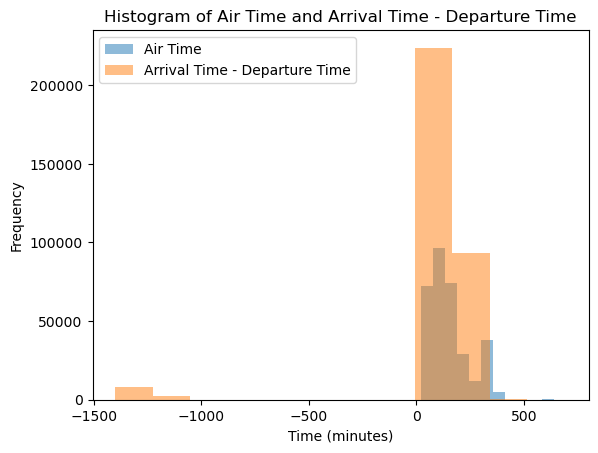

In [10]:
import matplotlib.pyplot as plt
# Create a histogram
plt.hist(flights['air_time'], bins=12, alpha=0.5, label='Air Time')
plt.hist(flights['arr_time_min'] - flights['dep_time_min'], bins=12, alpha=0.5, label='Arrival Time - Departure Time')

plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Air Time and Arrival Time - Departure Time')

# Display the legend
plt.legend()

plt.show()

### 11. We expect `air_time` and `arr_time_min` - `dep_time_min` to be the same, but they’re not. Why not? Identify a major data issue and subtle one.

Esto se debe a que en el código no se está considerando cuando hay salidas en un día t pero el arribo es en el día t+1, en otras palabras, un vuelo puede salir a las 20:00 horas o 1200 minutos (dep_time_min) de un día lunes, pero arribar en su destino a las 02:00 horas o 120 minutos (arr_time_min) de un día martes. En ese sentido al restar 120 - 1200 = -1080, sería un air_time negativo, cuando en real el verdadero air_time sería de 360.

### 12. Implement your fix to the major probelm. Remake the plot from the previous question.

In [25]:
flights['arr_minus_dep'] = np.where(flights['arr_time_min'] < flights['dep_time_min'],
                                    1440 + flights['arr_time_min'] - flights['dep_time_min'],
                                    flights['arr_time_min'] - flights['dep_time_min'])

flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,origin,dest,air_time,distance,hour,minute,time_hour,dep_time_min,arr_time_min,arr_minus_dep
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,317.0,510.0,193.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,333.0,530.0,197.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,342.0,563.0,221.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,344.0,604.0,260.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,354.0,492.0,138.0


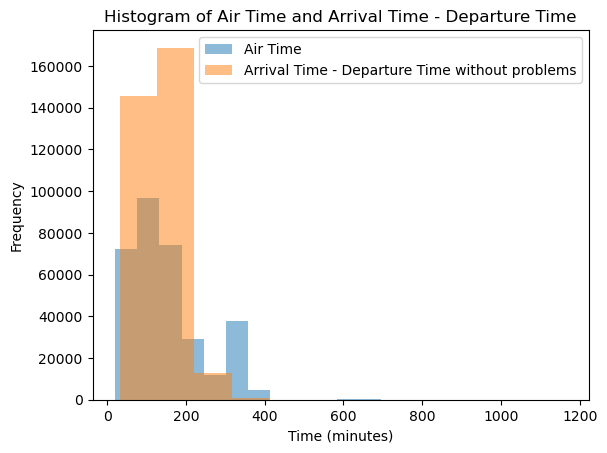

In [26]:
plt.hist(flights['air_time'], bins=12, alpha=0.5, label='Air Time')
plt.hist(flights['arr_minus_dep'], bins=12, alpha=0.5, label='Arrival Time - Departure Time without problems')

plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Air Time and Arrival Time - Departure Time')

# Display the legend
plt.legend()

plt.show()

Hay problemas inherentes en la base de datos, lo que nos impide tener las dos variables iguales, la creada y la reportada. Se debe consultar con el data engineer o la persona encargada de cargar esta base de datos, para ver la documentación que expliquen lo que significa cada variable.

### 13. Find the 10 most delayed flights

In [11]:
flights.sort_values('dep_delay', ascending=False).head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,dep_time_min,arr_time_min
7072,7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,...,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00,401.0,762.0
235778,235779,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,...,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00,872.0,967.0
8239,8240,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,...,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 16:00:00,681.0,759.0
327043,327044,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,...,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20 18:00:00,699.0,897.0
270376,270377,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,...,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22 16:00:00,525.0,644.0
173992,173993,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,...,N959DL,JFK,TPA,139.0,1005,19,0,2013-04-10 19:00:00,660.0,822.0
151974,151975,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,...,N927DA,LGA,MSP,167.0,1020,8,10,2013-03-17 08:00:00,1401.0,95.0
247040,247041,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,...,N3762Y,JFK,PDX,313.0,2454,19,0,2013-06-27 19:00:00,599.0,756.0
270987,270988,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,...,N6716C,LGA,ATL,109.0,762,7,59,2013-07-22 07:00:00,1377.0,81.0
87238,87239,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,...,N5DMAA,EWR,MIA,149.0,1085,17,0,2013-12-05 17:00:00,476.0,658.0


## Summarizing grouped data

### 14. Calculate average delays by destination for flights originating in NYC. Create a variable which ranks destinations from worst to best, where 1 is the worst rank.

In [12]:
flights['origin'].value_counts()

origin
EWR    120835
JFK    111279
LGA    104662
Name: count, dtype: int64

In [13]:
# Filter flights originating in NYC (assuming NYC airports are 'JFK', 'LGA', 'EWR')
nyc_flights = flights[flights['origin'].isin(['JFK', 'LGA', 'EWR'])]

# Calculate average delays by destination
average_delays = nyc_flights.groupby('dest')['dep_delay'].mean().reset_index()

# Create a variable that ranks destinations from worst to best
average_delays['rank'] = average_delays['dep_delay'].rank(ascending=False, method='min')

# Display the result
print(average_delays.sort_values('rank', ascending=True).head(5))

    dest  dep_delay  rank
18   CAE  35.570093   1.0
101  TUL  34.906355   2.0
67   OKC  30.568807   3.0
9    BHM  29.694853   4.0
103  TYS  28.493955   5.0


### 15. Which plane (`tailnum`) has the most minutes of delays total?

In [16]:
most_delayed_plane = flights.groupby('tailnum')['dep_delay'].sum().idxmax()

print("The plane with the most minutes of total delays is:", most_delayed_plane)
most_delayed_plane

The plane with the most minutes of total delays is: N15910


'N15910'

### 16. Which airlines only offer flights from New York to one other airport?

In [17]:
airlines_one_destination = flights[flights['origin'].isin(['JFK', 'LGA', 'EWR'])]\
    .groupby('carrier')['dest'].nunique().eq(1).index.tolist()

print("Airlines that only offer flights from New York to one other airport:", airlines_one_destination)

Airlines that only offer flights from New York to one other airport: ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV']


In [ ]:
# Grading: -1

### 17. Calculate the median arrival delay by airline.

In [18]:
median_arrival_delay_by_airline = flights.groupby('carrier')['arr_delay'].median().reset_index()

print("Median arrival delay by airline:\n\n"+str(median_arrival_delay_by_airline.sort_values('arr_delay', ascending=True)))

Median arrival delay by airline:

   carrier  arr_delay
2       AS      -17.0
8       HA      -13.0
1       AA       -9.0
13      VX       -9.0
4       DL       -8.0
0       9E       -7.0
10      OO       -7.0
11      UA       -6.0
12      US       -6.0
3       B6       -3.0
14      WN       -3.0
15      YV       -2.0
5       EV       -1.0
9       MQ       -1.0
7       FL        5.0
6       F9        6.0


### 18. ExpressJet has a median arrival delay of -1 minutes while US Airways has a median arrival delay of -6 minutes. Does this tell you that US Airways is a more reliable airline? Why or why not?


The median arrival delay values of -1 minutes for ExpressJet and -6 minutes for US Airways suggest that, on average, ExpressJet tends to arrive slightly earlier than the scheduled arrival time, while US Airways tends to arrive approximately 6 minutes earlier than the scheduled arrival time.

It's important to note that a lower median arrival delay does not necessarily mean that an airline is more reliable. The interpretation of airline reliability depends on various factors, and the median arrival delay is just one aspect. Here are some points to consider:

1. Scheduled Padding: Airlines may intentionally pad their schedules with extra time to make it more likely for flights to arrive on time. In such cases, a negative median delay might indicate that the airline is consistently ahead of its scheduled time.

2. Flight Distances and Types: Different airlines may operate flights with varying distances and types (short-haul vs. long-haul). Shorter flights might have less variability in arrival times compared to longer ones.

3. Operational Efficiency: Airlines might have different operational efficiencies, affecting their ability to adhere to schedules. Factors such as aircraft maintenance, ground operations, and airport congestion can impact reliability.

4. Data Consistency: Ensure the consistency and completeness of the data. Missing or incomplete data can affect the accuracy of delay calculations.

To evaluate the overall reliability of an airline, you should consider additional metrics, such as on-time arrival percentages, the distribution of delays, and customer reviews. Additionally, regulatory bodies often publish statistics on airline performance, which can provide a more comprehensive view of reliability.

In summary, while median arrival delay provides some insight into punctuality, it is essential to consider a broader set of metrics and factors to make a well-informed assessment of airline reliability.

### 19. Median arrival delay may not be the best metric for our needs. Brainstorm at least 4 additional ways to assess the typical delay characteristics of a group of flights.

Certainly, there are several additional ways to assess the typical delay characteristics of a group of flights beyond just median arrival delay. Here are four alternative metrics to consider:

1. Mean (Average) Delay:
    - **Calculation**: The mean delay is the sum of all delays divided by the number of flights.
    - **Usefulness**: While median is less sensitive to extreme values, the mean provides a measure of central tendency and can be useful for understanding the average delay across all flights.

2. Standard Deviation of Delays:
    - **Calculation**: The standard deviation measures the amount of variation or dispersion in a set of values. In the context of delays, it helps understand how spread out the delays are from the average.
    - **Usefulness**: A higher standard deviation indicates a greater degree of variability in delays, providing insights into the consistency of an airline's performance.

3. Percentage of On-Time Arrivals:
    - **Calculation**: The percentage of flights that arrive on time (with delays less than a certain threshold, e.g., 15 minutes).
    - **Usefulness**: This metric directly indicates the proportion of flights that adhere to the schedule and is a common measure of punctuality.

4. Delay Distribution (Histogram):
    - **Calculation**: Create a histogram of delay values to visualize the distribution of delays.
    - **Usefulness**: Histograms provide a visual representation of how delays are distributed across different time intervals. This can help identify patterns, such as peak delay periods.

These metrics, used in conjunction with median arrival delay, provide a more comprehensive view of an airline's performance. It's often beneficial to analyze delays from multiple perspectives to gain insights into different aspects of punctuality, consistency, and reliability.

### 20. Write a code which calculates your delay measures separately by airline. Do particular airlines perform poorly on multiple metrics?

In [50]:
# Calculate mean, median, standard deviation, and on-time percentage by airline
delay_metrics_by_airline = flights.groupby('carrier')['arr_delay'].agg(['median', 'mean', 'std'])

# Calculate the percentage of on-time arrivals (delay < 15 minutes)
on_time_percentage_by_airline = (flights[flights['arr_delay'] < 10].groupby('carrier').size() / flights.groupby('carrier').size()) * 100
on_time_percentage_by_airline = on_time_percentage_by_airline.rename('on_time_percentage')

# Combine the metrics into a single DataFrame
delay_metrics_by_airline = pd.concat([delay_metrics_by_airline, on_time_percentage_by_airline], axis=1)

print("Métricas de retraso por aerolínea:\n\n"+
      str(delay_metrics_by_airline.sort_values('median', ascending=True))+
      "\n\n Las aerolíneas que en general tienen malos resultados múltiples métricas de retraso son 2:\n\n 'FL' y 'F9'")

Métricas de retraso por aerolínea:

         median       mean        std  on_time_percentage
carrier                                                  
AS        -17.0  -9.930889  36.482633           80.392157
HA        -13.0  -6.915205  75.129420           80.994152
AA         -9.0   0.364291  42.516182           74.811329
VX         -9.0   1.764464  49.966450           76.365750
DL         -8.0   1.644341  44.402289           76.061110
9E         -7.0   7.379669  50.086778           66.408451
OO         -7.0  11.931034  48.584926           68.750000
UA         -6.0   3.558011  40.984344           71.840109
US         -6.0   2.129595  33.066952           73.880016
B6         -3.0   9.457973  42.842297           67.626979
WN         -3.0   9.649120  46.877702           67.959267
YV         -2.0  15.556985  52.922234           56.738769
EV         -1.0  15.796431  49.861469           59.832389
MQ         -1.0  10.774733  43.174306           63.041255
FL          5.0  20.115906  54.08767